In [1]:
import pandas as pd
import numpy as np

In [2]:
fntk_df = pd.DataFrame(
    {"close": [30.05, 30.36, 30.22, 30.52, 30.45, 31.85, 30.47, 30.60, 30.21, 31.30]}
)

# Review the DataFrame
fntk_df

,close
0,30.05
1,30.36
2,30.22
3,30.52
4,30.45
5,31.85
6,30.47
7,30.60
8,30.21
9,31.30


In [3]:
# Set the index as datetime objects starting from 2019-09-09, but only for business days
fntk_df.index = pd.bdate_range(start='2019-09-09', periods=10)

# Review the DataFrame
fntk_df

,close
2019-09-09,30.05
2019-09-10,30.36
2019-09-11,30.22
2019-09-12,30.52
2019-09-13,30.45
2019-09-16,31.85
2019-09-17,30.47
2019-09-18,30.60
2019-09-19,30.21
2019-09-20,31.30


<AxesSubplot:>

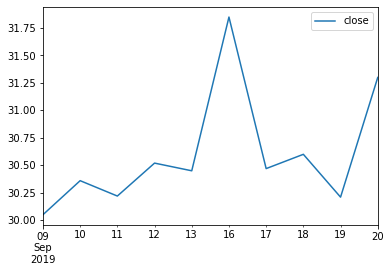

In [4]:
fntk_df.plot()

In [7]:
fntk_df['trade_type'] = np.nan

# Initialize variable to hold previous day's trading price
# Set the initial value of the previous_price to 0
previous_price = 0
fntk_df

,close,trade_type
2019-09-09,30.05,NaN
2019-09-10,30.36,NaN
2019-09-11,30.22,NaN
2019-09-12,30.52,NaN
2019-09-13,30.45,NaN
2019-09-16,31.85,NaN
2019-09-17,30.47,NaN
2019-09-18,30.60,NaN
2019-09-19,30.21,NaN
2019-09-20,31.30,NaN


In [13]:
# Initialize trade_type column to track buys and sells
fntk_df["trade_type"] = np.nan

# Initialize variable to hold previous day's trading price
# Set the initial value of the previous_price to 0
previous_price = 0

# Loop through the Pandas DataFrame and initiate a trade at each iteration
for index, row in fntk_df.iterrows():

    # buy if the previous_price is 0, in other words, buy on the first day
    if previous_price == 0:
        fntk_df.loc[index, "trade_type"] = "buy"

    # buy if the current day's price is less than the previous day's price
    elif row["close"] < previous_price:
        fntk_df.loc[index, "trade_type"] = "buy"

    # sell if the current day's price is greater than the previous day's price
    elif row["close"] > previous_price:
        fntk_df.loc[index, "trade_type"] = "sell"

    # hold if the current day's price is equal to the previous day's price
    else:
        fntk_df.loc[index, "trade_type"] = "hold"

    # update the previous_price to the current row's price
    previous_price = row["close"]

    # if the index is the last index of the DataFrame, sell
    if index == fntk_df.index[-1]:
        fntk_df.loc[index, "trade_type"] = "sell"
# Review the DataFrame
fntk_df
    

,close,trade_type,cost/proceeds
2019-09-09,30.05,buy,NaN
2019-09-10,30.36,sell,NaN
2019-09-11,30.22,buy,NaN
2019-09-12,30.52,sell,NaN
2019-09-13,30.45,buy,NaN
2019-09-16,31.85,sell,NaN
2019-09-17,30.47,buy,NaN
2019-09-18,30.60,sell,NaN
2019-09-19,30.21,buy,NaN
2019-09-20,31.30,sell,NaN


In [10]:
# Initialize a cost/proceeds column for recording trade metrics
fntk_df["cost/proceeds"] = np.nan
# Initialize share size and accumulated shares
share_size = 100
accumulated_shares = 0
fntk_df

,close,trade_type,cost/proceeds
2019-09-09,30.05,buy,NaN
2019-09-10,30.36,sell,NaN
2019-09-11,30.22,buy,NaN
2019-09-12,30.52,sell,NaN
2019-09-13,30.45,buy,NaN
2019-09-16,31.85,sell,NaN
2019-09-17,30.47,buy,NaN
2019-09-18,30.60,sell,NaN
2019-09-19,30.21,buy,NaN
2019-09-20,31.30,sell,NaN


In [15]:
# Initialize trade_type column to track buys and sells
fntk_df["trade_type"] = np.nan

# Initialize a cost/proceeds column for recording trade metrics
fntk_df["cost/proceeds"] = np.nan

# Initialize share size and accumulated shares
share_size = 100
accumulated_shares = 0

# Initialize variable to hold previous price
previous_price = 0

# Loop through the Pandas DataFrame and initiate a trade at each iteration
for index, row in fntk_df.iterrows():

    # buy if the previous_price is 0, in other words, buy on the first day
    if previous_price == 0:
        fntk_df.loc[index, "trade_type"] = "buy"

        # calculate the cost of the trade by multiplying the current day's price
        # by the share_size, or number of shares purchased
        fntk_df.loc[index, "cost/proceeds"] = -(row["close"] * share_size)

        # add the number of shares purchased to the accumulated shares
        accumulated_shares += share_size

    # buy if the current day's price is less than the previous day's price
    elif row["close"] < previous_price:
        fntk_df.loc[index, "trade_type"] = "buy"

        # calculate the cost of the trade by multiplying the current day's price
        # by the share_size, or number of shares purchased
        fntk_df.loc[index, "cost/proceeds"] = -(row["close"] * share_size)

        # add the number of shares purchased to the accumulated shares
        accumulated_shares += share_size

    # hold if the current day's price is greater than the previous day's price
    elif row["close"] > previous_price:
        fntk_df.loc[index, "trade_type"] = "hold"

    # hold if the current day's price is equal to the previous day's price
    else:
        fntk_df.loc[index, "trade_type"] = "hold"

    # update the previous_price to the current row's price
    previous_price = row["close"]

    # if the index is the last index of the DataFrame, sell
    if index == fntk_df.index[-1]:
        fntk_df.loc[index, "trade_type"] = "sell"

        # calculate the proceeds by multiplying the last day's price by the accumulated shares
        fntk_df.loc[index, "cost/proceeds"] = row["close"] * accumulated_shares

# Review the DataFrame
fntk_df

,close,trade_type,cost/proceeds
2019-09-09,30.05,buy,-3005.0
2019-09-10,30.36,hold,NaN
2019-09-11,30.22,buy,-3022.0
2019-09-12,30.52,hold,NaN
2019-09-13,30.45,buy,-3045.0
2019-09-16,31.85,hold,NaN
2019-09-17,30.47,buy,-3047.0
2019-09-18,30.60,hold,NaN
2019-09-19,30.21,buy,-3021.0
2019-09-20,31.30,sell,15650.0


In [16]:
# Calculate the total profit/loss for 100 share size orders
total_profit_loss = round(fntk_df["cost/proceeds"].sum(), 2)

# Print the profit/loss metrics
print(f"The total profit/loss of the trading strategy is ${total_profit_loss}.")

The total profit/loss of the trading strategy is $510.0.


In [17]:
# Initialize the variable to hold the value of the invested capital
invested_capital = 0

# Calculate the invested capital by adding the cost of all buy trades
for index, row in fntk_df.iterrows():
    if row["trade_type"] == "buy":
        invested_capital = invested_capital + row["cost/proceeds"]


# Calculate the return on investment (ROI)
roi = round((total_profit_loss / -(invested_capital)) * 100, 2)

# Print the ROI
print(f"The trading algorithm resulted in a return on investment of {roi}%")

The trading algorithm resulted in a return on investment of 3.37%
